# Accessing Summit EFD
2021.08.06  
Bruno C. Quint  

## Introduction

Let me use this notebook as a tool to teach myself how to access the Engineering and Facility Database (EFD) at the Summit while trying to do some explanatory data analysis. Again, my primary goal here is to learn the Python interface with to the EFD.

## Setup 

Here is where I will import all the libraries used in this notebook. I usually export my code to modules and packages so the notebook is cleaner. However, having all the code here allows quicker reference for myself and others in the future.  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

from astropy.time import Time

## Helper Functions

One thing that I like to do on my notebooks is to create my own functions and separate them using MarkDown Headers for easy navigation. Here are a few examples.

### retrieve_efd_client()

In [2]:
def retrieve_efd_client(is_at_summit=True):
    """
    Retrieves a client to the Engireering Facility Database. 
    
    Parameters
    ----------
    is_at_summit : bool, optional
        If this notebook runs at the Summit, returns a client that connect to 
        the Summit EFD. Otherwhice, results the NCSA TestSand (NST) EFD.
    
    Returns
    -------
    EfdClient : the interface object between Nublado and the Summit or NST EFD.
    """
    from lsst_efd_client import EfdClient
    
    c = EfdClient('summit_efd') if is_at_summit \
        else EfdClient('ncsa_teststand_efd') 
        
    return c

## Gathering Data
 
First of all, the notebook will have different behavior if we run at the Summit or at the NCSA TestSand (NTS) (or other simulated environments). 

In [3]:
# Let me open up the communication channel with the EFD.
client = retrieve_efd_client()

In [4]:
# I need to pass timestamps to the client to get my time series 
start = Time('2021-08-05T00:00:00', scale='tai') 
end = Time('2021-08-05T19:00:00', scale='tai')

# And here is how I retrieve my data as a Pandas DataFrame
df = await client.select_time_series('lsst.sal.WeatherStation.windSpeed', 
                                     fields='*', start=start, end=end)

In [5]:
df

,WeatherStationID,avg10M,avg2M,max10M,max2M,min2M,private_efdStamp,private_host,private_identity,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,sensorName,value
2021-08-05 00:00:21.425000+00:00,1,4.7,4.7,5.5,5.3,3.4,1.628122e+09,0,WeatherStation:1,1.628122e+09,12225,1.628122e+09,cc636389,8668,1.628122e+09,,4.5
2021-08-05 00:01:21.436000+00:00,1,4.6,4.5,5.5,5.3,3.4,1.628122e+09,0,WeatherStation:1,1.628122e+09,12225,1.628122e+09,cc636389,8669,1.628122e+09,,5.3
2021-08-05 00:02:21.429000+00:00,1,4.6,4.7,5.5,5.4,3.5,1.628122e+09,0,WeatherStation:1,1.628122e+09,12225,1.628122e+09,cc636389,8670,1.628122e+09,,4.6
2021-08-05 00:03:21.429000+00:00,1,4.6,4.9,5.5,5.4,3.8,1.628122e+09,0,WeatherStation:1,1.628122e+09,12225,1.628122e+09,cc636389,8671,1.628122e+09,,4.9
2021-08-05 00:04:21.435000+00:00,1,4.6,4.9,5.5,5.1,4.0,1.628122e+09,0,WeatherStation:1,1.628122e+09,12225,1.628122e+09,cc636389,8672,1.628122e+09,,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05 18:55:20.877000+00:00,1,4.9,3.5,8.4,5.5,0.7,1.628190e+09,0,WeatherStation:1,1.628190e+09,12225,1.628190e+09,cc636389,9803,1.628190e+09,,5.0
2021-08-05 18:56:20.915000+00:00,1,5.2,5.8,9.0,9.0,1.3,1.628190e+09,0,WeatherStation:1,1.628190e+09,12225,1.628190e+09,cc636389,9804,1.628190e+09,,8.4
2021-08-05 18:57:20.896000+00:00,1,5.5,7.5,9.0,9.0,5.1,1.628190e+09,0,WeatherStation:1,1.628190e+09,12225,1.628190e+09,cc636389,9805,1.628190e+09,,6.4
2021-08-05 18:58:20.903000+00:00,1,5.5,6.7,9.0,8.6,5.0,1.628190e+09,0,WeatherStation:1,1.628190e+09,12225,1.628190e+09,cc636389,9806,1.628190e+09,,5.0


## Plotting the data

Now that we have our Pandas DataFrame, let me plot it.

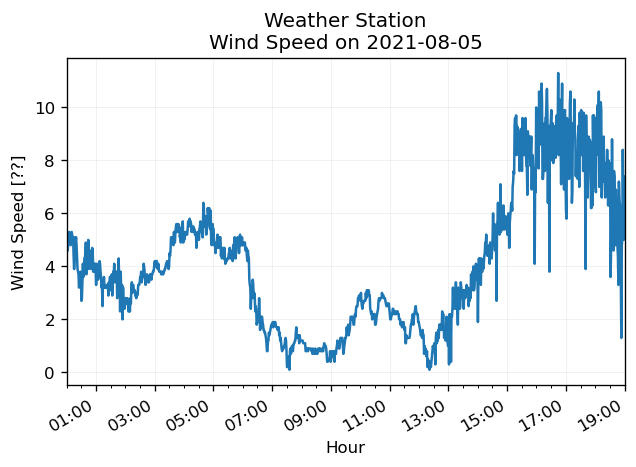

In [6]:
fig, ax = plt.subplots(num="Weather Station - Wind Speed", dpi=120)

# Major ticks every 5 Hour.
loc_maj_ticks = mdates.HourLocator(interval=2)
ax.xaxis.set_major_locator(loc_maj_ticks)

# Minor ticks every 0.5 Hour
loc_min_ticks = mdates.MinuteLocator(interval=30)
ax.xaxis.set_minor_locator(loc_min_ticks)

# Format Major 
fmt = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(fmt)

# Set labels
ax.set_xlabel("Hour")
ax.set_ylabel("Wind Speed [??]")

# Round to nearest years.
datemin = df.index[0].round('min')
datemax = df.index[-1].round('min') + np.timedelta64(1, 'm')
ax.set_xlim(datemin, datemax)

# Plot Data
ax.plot(df.index, df.value)

# Display title and sub-title
ax.set_title(f"Weather Station\nWind Speed on {df.index[0]:%Y-%m-%d}")

# Setting grid
ax.grid(lw='0.5', alpha=0.2, ls='-')

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

# Display Plot
plt.show()